[Dataset de Kaggle](https://www.kaggle.com/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224)

In [8]:
import time
tiempo_inicial = time.time()

In [9]:
import datetime
import zoneinfo

# creamos las zonas horarias ( https://nodatime.org/TimeZones )
zona_hermosillo = zoneinfo.ZoneInfo("America/Hermosillo")

In [10]:
# Common
import os
import keras
import numpy as np
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt

# Data processing
import pandas as pd
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data visuals
import seaborn as sns
import matplotlib.pyplot as plt

# Model build
from keras import Sequential
#from keras.layers import Dense, Dropout
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

## **Datos**

In [11]:
import kagglehub

# Descarga el dataset (última versión disponible)
dataset_path = kagglehub.dataset_download("gpiosenka/coffee-bean-dataset-resized-224-x-224")

print("Dataset descargado en:", dataset_path)




/home/lcc_rn_08/.conda/envs/ml_gpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 144M/144M [00:03<00:00, 42.9MB/s] 


Extracting files...
Dataset descargado en: /home/lcc_rn_08/.cache/kagglehub/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224/versions/1


In [12]:
import tensorflow as tf

img_height, img_width = 224, 224
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + '/train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + '/train',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + '/test',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

Found 1200 files belonging to 4 classes.
Using 960 files for training.
Found 1200 files belonging to 4 classes.
Using 240 files for validation.
Found 400 files belonging to 4 classes.


In [13]:
train_ds.class_names

['Dark', 'Green', 'Light', 'Medium']

# **Visualizando las imágenes y las clases**

2025-10-02 11:00:03.930248: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


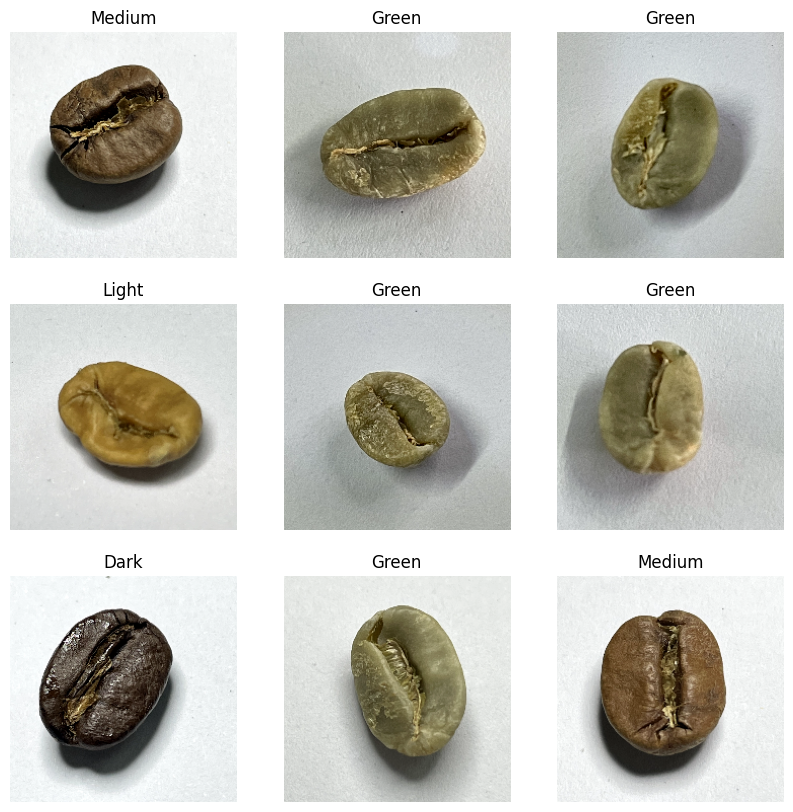

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



---



---



#Modelo1

##Definir el modelo

In [16]:
from keras.layers import Rescaling, Input, Dense, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras import regularizers

model = Sequential([
    Input(shape=(img_height,img_width, 3)),
    Rescaling(1./255),
    Flatten( ),
    BatchNormalization(),

    Dense(30,kernel_regularizer=regularizers.l2(0.001)),
    Activation('relu'),
    Dropout(0.3),

    Dense(40,kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    #Dropout(0.3),

    Dense(10,kernel_regularizer=regularizers.l2(0.001)),
   # BatchNormalization(),
    Activation('relu'),
    #Dropout(0.3),

    Dense(4, activation='softmax')  # <---- capa de salida
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.1, patience = 6, min_lr = 0.000001, verbose = 2, mode='min' )
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=2, mode='min' )

In [18]:
numEpocas = 300
%time historial = model.fit(train_ds, validation_data=val_ds, epochs = numEpocas, verbose = 1, callbacks=[reduce_lr, early_stop])

Epoch 1/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4021 - loss: 1.4679 - val_accuracy: 0.2208 - val_loss: 2.3462 - learning_rate: 0.0010
Epoch 2/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5542 - loss: 1.3033 - val_accuracy: 0.2208 - val_loss: 1.8292 - learning_rate: 0.0010
Epoch 3/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5917 - loss: 1.1634 - val_accuracy: 0.2208 - val_loss: 1.6137 - learning_rate: 0.0010
Epoch 4/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6625 - loss: 1.0215 - val_accuracy: 0.4208 - val_loss: 1.4448 - learning_rate: 0.0010
Epoch 5/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7385 - loss: 0.8791 - val_accuracy: 0.6292 - val_loss: 1.2771 - learning_rate: 0.0010
Epoch 6/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7708 - loss: 0.7822 - val_accuracy: 0.5208 - val_loss: 1.1708 - learning_rate: 0.0010
Epoch 7/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8021 - loss: 0.6881 - 

##Gráficas de loss y accuracy

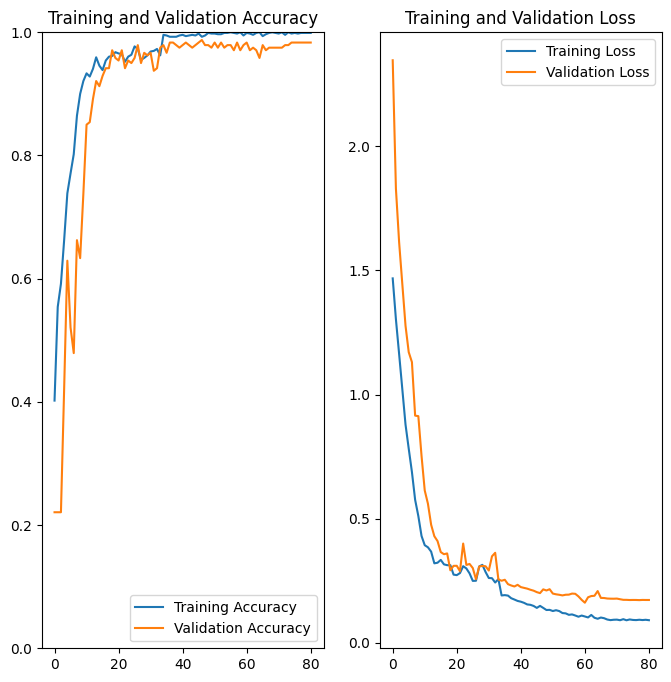

In [19]:
epochs_done = len(historial.history['accuracy'])
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

epochs_range = range(epochs_done )

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9925 - loss: 0.1202


[0.12018438428640366, 0.9925000071525574]

In [21]:
y_pred = model.predict( test_ds )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


##Matriz de confusión

2025-10-02 11:01:47.505935: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


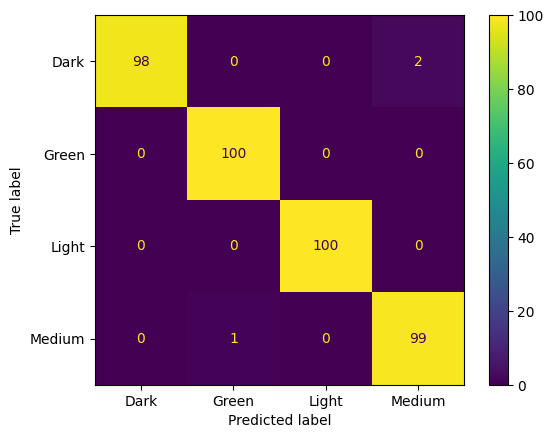

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_label = np.concatenate([y for x, y in test_ds], axis=0)

con = confusion_matrix( test_label,  np.argmax(y_pred, axis=1)  )
disp = ConfusionMatrixDisplay( confusion_matrix = con ,  display_labels = test_ds.class_names ).plot()
plt.show()

#Modelo2

##Aumento de datos

In [23]:
data_augmentation = keras.Sequential(
  [ Input(shape=(img_height,img_width, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation( .1 ),
    layers.RandomZoom( .5 )
  ]
)

In [24]:
model2 = Sequential([
    data_augmentation,
    Rescaling(1./255),
    Flatten( ),
    BatchNormalization(),

    Dense(30,kernel_regularizer=regularizers.l2(0.001)),
    Activation('relu'),
    Dropout(0.3),

    Dense(40,kernel_regularizer=regularizers.l2(0.001)),
    Activation('relu'),
    Dropout(0.3),

    Dense(10,kernel_regularizer=regularizers.l2(0.001)),
    Activation('relu'),

   Dense(4, activation='softmax')  # <---- capa de salida
])

model2.compile(optimizer = keras.optimizers.Adagrad(learning_rate=0.0012589), loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
%time historial = model2.fit(train_ds, validation_data=val_ds, epochs = numEpocas, verbose = 1, callbacks=[reduce_lr, early_stop])

Epoch 1/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.3094 - loss: 2.5738 - val_accuracy: 0.1875 - val_loss: 1.4983 - learning_rate: 0.0013
Epoch 2/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.3885 - loss: 2.1267 - val_accuracy: 0.2458 - val_loss: 1.4947 - learning_rate: 0.0013
Epoch 3/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.4000 - loss: 1.8544 - val_accuracy: 0.1375 - val_loss: 1.5036 - learning_rate: 0.0013
Epoch 4/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.4521 - loss: 1.7129 - val_accuracy: 0.2667 - val_loss: 1.4812 - learning_rate: 0.0013
Epoch 5/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.4479 - loss: 1.6268 - val_accuracy: 0.3292 - val_loss: 1.3463 - learning_rate: 0.0013
Epoch 6/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4879 - loss: 1.4882
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0001258900039829314.
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.4854 - loss: 1.5088 - va

In [26]:
model2.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7750 - loss: 0.8662


[0.8661730289459229, 0.7749999761581421]

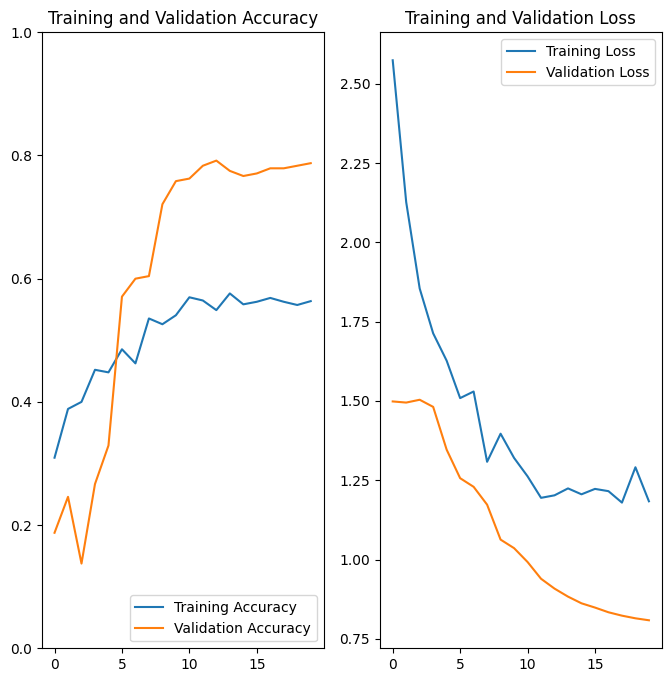

In [27]:
epochs_done = len(historial.history['accuracy'])
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

epochs_range = range(epochs_done )

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


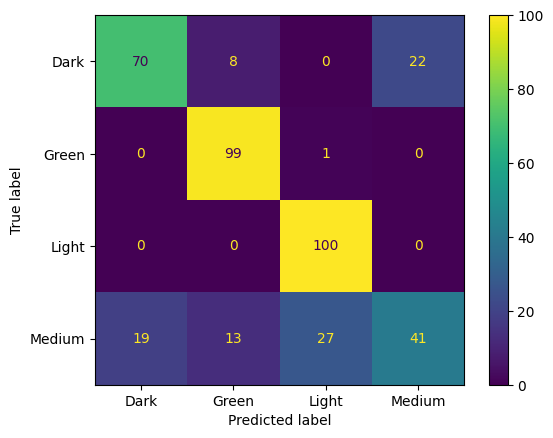

In [28]:
y_pred = model2.predict( test_ds )
con = confusion_matrix( test_label,  np.argmax(y_pred, axis=1)  )
disp = ConfusionMatrixDisplay( confusion_matrix = con ,  display_labels = test_ds.class_names ).plot()
plt.show()

##Definir el modelo

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [30]:
model3 = Sequential([
    # Input + normalización de píxeles
    Input(shape=(img_height, img_width, 3)),
    Rescaling(1./255),

    # Bloque convolucional 1
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Bloque convolucional 2
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Bloque convolucional 3
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Flatten y fully connected
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),

    # Capa de salida
    Dense(4, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
%time historial = model3.fit(train_ds, validation_data=val_ds, epochs = numEpocas, verbose = 1, callbacks=[reduce_lr, early_stop])

Epoch 1/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 648ms/step - accuracy: 0.6354 - loss: 9.8554 - val_accuracy: 0.3208 - val_loss: 76.5934 - learning_rate: 0.0010
Epoch 2/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 651ms/step - accuracy: 0.8531 - loss: 2.3736 - val_accuracy: 0.3208 - val_loss: 177.0224 - learning_rate: 0.0010
Epoch 3/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 656ms/step - accuracy: 0.8896 - loss: 1.7884 - val_accuracy: 0.3208 - val_loss: 224.9412 - learning_rate: 0.0010
Epoch 4/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 644ms/step - accuracy: 0.9042 - loss: 1.6854 - val_accuracy: 0.3208 - val_loss: 281.7300 - learning_rate: 0.0010
Epoch 5/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 658ms/step - accuracy: 0.8979 - loss: 1.4229 - val_accuracy: 0.3208 - val_loss: 274.5164 - learning_rate: 0.0010
Epoch 6/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.8650 - loss: 1.7247
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 672ms/step - accuracy: 0.8

In [35]:
model3.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5275 - loss: 24.4786


[24.47858428955078, 0.5274999737739563]

##Gráficas de loss y accuracy

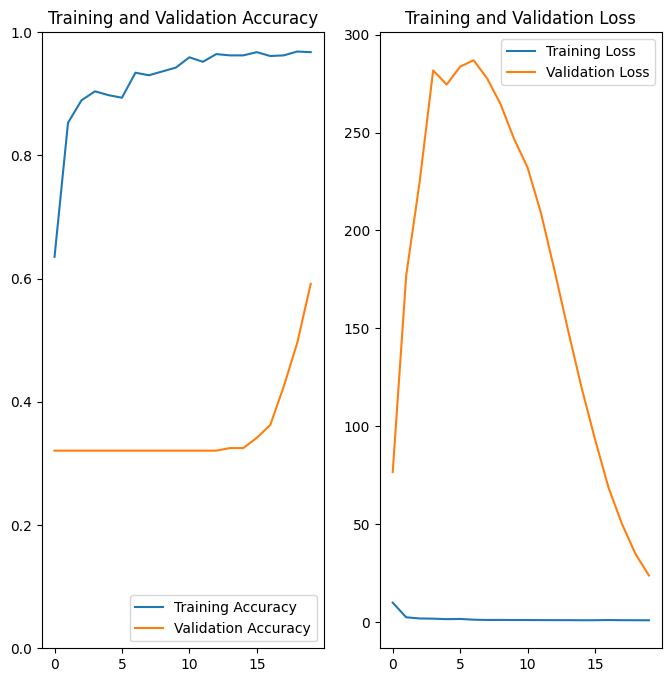

In [36]:
epochs_done = len(historial.history['accuracy'])
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

epochs_range = range(epochs_done )

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Matriz de confusión

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


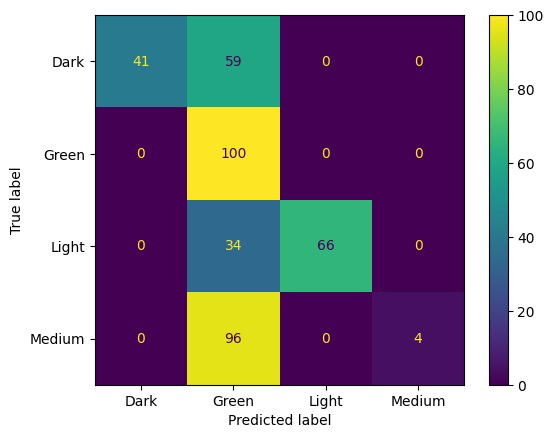

In [37]:
y_pred = model3.predict( test_ds )
con = confusion_matrix( test_label,  np.argmax(y_pred, axis=1)  )
disp = ConfusionMatrixDisplay( confusion_matrix = con ,  display_labels = test_ds.class_names ).plot()
plt.show()